# Neural Network for Cancer Prediction using Gene Expression Data
I will be using RNA-seq gene expression data for different cancer types. The rows represent cancer samples and the columns represent gene count values. The last column contains the cancer categories.

The data can be found here: https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq

## Import Required Libraries

In [1]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## Read Data

In [2]:
df = pd.read_csv('cancer_gene_expression.csv')

## Data Exploration & Cleaning

In [3]:
# view first few rows
df.head()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA
3,0.0,0.0,0.0,1.173191,0.0,0.0,0.0,0.0,1.527371,2.732899,...,11.261713,8.725676,6.300418,6.036451,11.732303,7.559469,9.596453,2.863046,3.380342,KIRC
4,0.0,0.0,0.0,1.366532,0.0,0.0,0.0,0.0,0.000000,3.388355,...,12.241965,7.685204,5.142948,6.355788,11.493950,8.139444,10.189256,6.544487,0.839395,COAD


In [4]:
# view shape
df.shape

(801, 8001)

In [5]:
# note: last column contains labels
df.columns[-1]

'Cancer_Type'

In [6]:
# check for missing values
datanul = df.isnull().sum()
g = [i for i in datanul if i>0]

print('columsn with missing values:%d'%len(g))

columsn with missing values:0


In [7]:
# check cancer types
df['Cancer_Type'].value_counts()

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

This shows us 5 different types of cancer with their respective number of samples diagnosed.

<Axes: xlabel='Cancer_Type'>

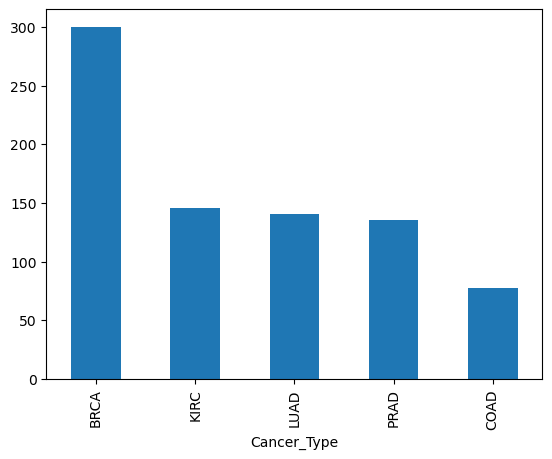

In [8]:
# plot cancer types as bar chart to view distribution
df['Cancer_Type'].value_counts().plot.bar()

## Data Preprocessing
This is done to format the data before modeling.

In [9]:
# separate data into features (X) and class (y)
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

X.shape

(801, 8000)

In [10]:
y.shape

(801,)

**Encode Labels**

The labels for this data are categorical so we must convert them to numerical (referred to as encoding). Machine learning models usually require input data to be in numeric forms, hence we encode the labels. 

In [11]:
# encode target labels (y) with values between 0 and n_classes-1
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y)
nclasses=np.unique(y).shape[0]

In [12]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [13]:
classes

array([0, 1, 2, 3, 4])

**Data Splitting**

Data is split into three sets: training, validation and test 

- training set is used for training the model
- validation set is used for evaluating the model during training
- test set is used to test the model after training and tuning has been completed

In [14]:
#split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#split the training set into two (training and validation)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2)

**Data Normalization**

Data normalization is done so that the values are within the same range. This improves model performance and avoids bias. 

In [15]:
# scale data between 0 and 1
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_val=min_max_scaler.fit_transform(X_val)
X_test=min_max_scaler.fit_transform(X_test)

## Build the Neural Network Model

In [16]:
#define model
model = Sequential()

#hidden layer 1
model.add(Dense(40, input_dim=X_train.shape[1], activation='relu'))

#hidden layer 2
model.add(Dense(20, activation='relu'))

#output layer
model.add(Dense(nclasses, activation='softmax'))

#define optimizer and learning rate. We will use Adam optimizer
opt_adam = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=opt_adam, metrics=[keras.metrics.SparseCategoricalAccuracy()])

c:\Users\niles\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#fit the model to the training data
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32,epochs=200, verbose=1)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.6410 - sparse_categorical_accuracy: 0.2842 - val_loss: 1.3984 - val_sparse_categorical_accuracy: 0.3750
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3486 - sparse_categorical_accuracy: 0.4618 - val_loss: 1.2822 - val_sparse_categorical_accuracy: 0.4922
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1026 - sparse_categorical_accuracy: 0.5950 - val_loss: 0.9102 - val_sparse_categorical_accuracy: 0.8438
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8227 - sparse_categorical_accuracy: 0.8657 - val_loss: 0.8221 - val_sparse_categorical_accuracy: 0.7500
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6323 - sparse_categorical_accuracy: 0.8811 - val_loss: 0.5344 - val_sparse_categorical_accuracy: 0.8750
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4552 - sparse_categorical_accuracy: 0.9314 - val_loss: 0.3601 - val_sparse_categorical_accuracy: 0.9609
Epoch 7/2

In [18]:
predictions = model.predict(X_test)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [19]:
#get the predictions for the first 20 samples in the test set
for index,entry in enumerate(predictions[0:20,:]):
    print('predicted:%d ,actual:%d'%(np.argmax(entry),y_test[index]))

predicted:4 ,actual:4
predicted:4 ,actual:4
predicted:1 ,actual:1
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:3 ,actual:3
predicted:4 ,actual:4
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:0 ,actual:0
predicted:2 ,actual:2
predicted:3 ,actual:3
predicted:0 ,actual:0
predicted:1 ,actual:1


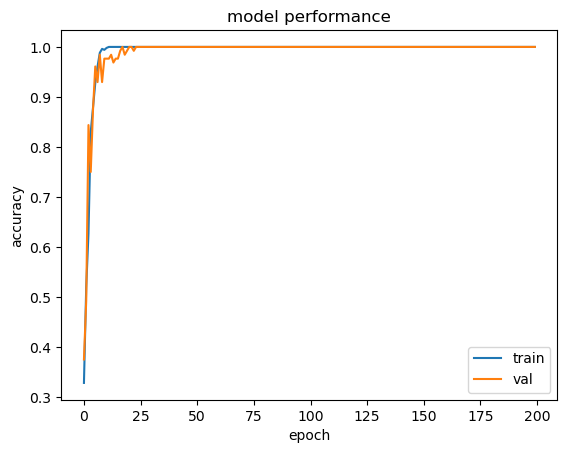

In [20]:
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

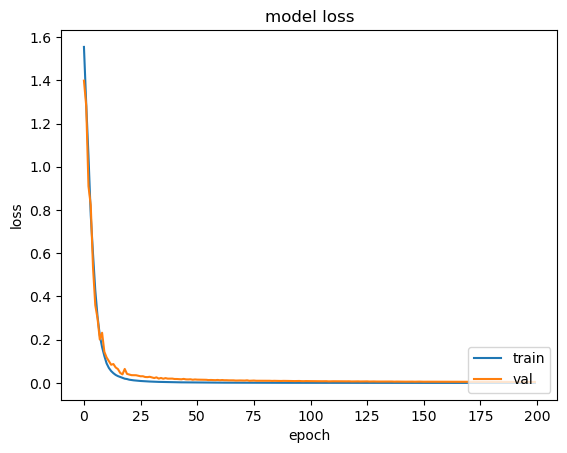

In [21]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()